In [1]:
import pandas as pd

citibike_data = None

for month in range(1,13):
    if month < 10:
        month_str = f'0{month}'
    else:
        month_str = f'{month}'
    print('Loading month', month_str)
    current_month = pd.read_csv(f'../dataset/2018{month_str}-citibike-tripdata.csv')
    
    if citibike_data is None:
        citibike_data = current_month
    else:
        citibike_data = citibike_data.append(current_month)
citibike_data = citibike_data.dropna()

Loading month 01
Loading month 02
Loading month 03
Loading month 04
Loading month 05
Loading month 06
Loading month 07
Loading month 08
Loading month 09
Loading month 10
Loading month 11
Loading month 12


In [2]:
citibike_data = citibike_data.dropna()

import numpy as np

citibike_data['starttime'] = pd.to_datetime(citibike_data['starttime'])
citibike_data['stoptime'] = pd.to_datetime(citibike_data['stoptime'])

citibike_data['tripduration'] = (citibike_data['stoptime'] - citibike_data['starttime']).dt.total_seconds().apply(np.floor).astype(int)

filter_columns = [
    'tripduration', 
    'starttime', 
    'stoptime', 
    'start station id',
    'start station latitude',
    'start station longitude',
    'end station id',
    'end station latitude',
    'end station longitude',
    'usertype',
    'birth year',
    'gender'
]
citibike_data = citibike_data[filter_columns]
citibike_data = citibike_data[citibike_data['tripduration'] <= 20*24*60*60]

citibike_data = citibike_data[citibike_data['end station latitude'] <= 41.13]
citibike_data = citibike_data[citibike_data['start station latitude'] <= 41.13]
citibike_data = citibike_data[citibike_data['end station latitude'] >= 40.12]
citibike_data = citibike_data[citibike_data['start station latitude'] >= 40.12]
citibike_data = citibike_data[citibike_data['end station longitude'] >= -74.40]
citibike_data = citibike_data[citibike_data['start station longitude'] >= -74.40]
citibike_data = citibike_data[citibike_data['end station longitude'] <= -73.19]
citibike_data = citibike_data[citibike_data['start station longitude'] <= -73.19]

citibike_data['start_weekday'] = citibike_data['starttime'].dt.day_name()

citibike_data

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,usertype,birth year,gender,start_weekday
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,Subscriber,1992,1,Monday
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,Subscriber,1969,1,Monday
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,Subscriber,1956,1,Monday
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,Subscriber,1974,1,Monday
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,Subscriber,1992,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016500,734,2018-12-31 23:55:06.991,2019-01-01 00:07:21.230,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,Subscriber,1986,1,Monday
1016501,2551,2018-12-31 23:55:44.307,2019-01-01 00:38:15.782,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,Customer,1969,0,Monday
1016502,2376,2018-12-31 23:56:52.850,2019-01-01 00:36:29.286,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,Subscriber,1979,1,Monday
1016503,2758,2018-12-31 23:58:29.212,2019-01-01 00:44:27.517,3320.0,40.794067,-73.962868,281.0,40.764397,-73.973715,Customer,1969,0,Monday


In [3]:
features_df = citibike_data #.head(10000)

In [4]:
from sklearn import preprocessing

unique_labels = features_df['usertype'].unique()
unique_weekdays = features_df['start_weekday'].unique()
le_ut = preprocessing.LabelEncoder()
le_ut.fit(unique_labels)
le_wd = preprocessing.LabelEncoder()
le_wd.fit(unique_weekdays)

LabelEncoder()

In [5]:
features_df['usertype'] = le_ut.transform(features_df['usertype']) 
features_df['start_weekday'] = le_wd.transform(features_df['start_weekday']) 

In [7]:
feature_columns = [
    'tripduration', 
    'start station latitude',
    'start station longitude',
    'end station latitude',
    'end station longitude',
    'birth year',
    'start_weekday',
    'gender'
]
label_column = 'usertype'

features_df = features_df[feature_columns + [label_column]]
features_df

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,birth year,start_weekday,gender,usertype
0,970,40.767272,-73.993929,40.749013,-73.988484,1992,1,1,1
1,723,40.767272,-73.993929,40.750585,-73.994685,1969,1,1,1
2,496,40.767272,-73.993929,40.755942,-74.002116,1956,1,1,1
3,306,40.767272,-73.993929,40.763707,-73.985162,1974,1,1,1
4,306,40.767272,-73.993929,40.774667,-73.984706,1992,1,1,1
...,...,...,...,...,...,...,...,...,...
1016500,734,40.730477,-73.999061,40.749156,-73.991600,1986,1,1,1
1016501,2551,40.794067,-73.962868,40.765909,-73.976342,1969,1,0,0
1016502,2376,40.701907,-74.013942,40.701221,-74.012342,1979,1,1,1
1016503,2758,40.794067,-73.962868,40.764397,-73.973715,1969,1,0,0


In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    features_df, 
    test_size=0.33, 
    random_state=42, 
    stratify=features_df[label_column]
)

In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(
    train_set[feature_columns], 
    train_set[label_column]
)

In [10]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

predicted_labels = clf.predict(test_set[feature_columns])
true_labels = test_set[label_column].tolist()

print(f1_score(true_labels, predicted_labels))

print(le_ut.transform(unique_labels))
print(unique_labels)

# true_labels = le_ut.inverse_transform(true_labels)
# predicted_labels = le_ut.inverse_transform(predicted_labels)

print(classification_report(true_labels, predicted_labels))

0.957531393930119
[1 0]
['Subscriber' 'Customer']
              precision    recall  f1-score   support

           0       0.65      0.68      0.67    637643
           1       0.96      0.95      0.96   5152363

    accuracy                           0.92   5790006
   macro avg       0.81      0.82      0.81   5790006
weighted avg       0.93      0.92      0.93   5790006



In [11]:
clf.feature_importances_

array([0.15933697, 0.07344344, 0.06970923, 0.06944573, 0.0681779 ,
       0.08300612, 0.02773077, 0.44914985])

In [12]:
unique_labels

array(['Subscriber', 'Customer'], dtype=object)

In [13]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [14]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN, SMOTE

#print('Original dataset shape %s' % Counter(y))

smo = SMOTE(random_state=42)
# ada = ADASYN(random_state=42)
x_res, y_res = smo.fit_resample(train_set[feature_columns], train_set[label_column])
# x_res, y_res = ada.fit_resample(features_df[feature_columns], features_df[label_column])
print('Resampled dataset shape %s' % Counter(y_res))

y_res

Using TensorFlow backend.


Resampled dataset shape Counter({1: 10460857, 0: 10460857})


0           1
1           0
2           1
3           0
4           1
           ..
20921709    0
20921710    0
20921711    0
20921712    0
20921713    0
Name: usertype, Length: 20921714, dtype: int64

In [15]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(
    x_res, 
    y_res
)

In [16]:
predicted_labels = clf2.predict(test_set[feature_columns])
true_labels = test_set[label_column].tolist()

print(f1_score(true_labels, predicted_labels))

print(le_ut.transform(unique_labels))
print(unique_labels)

# true_labels = le_ut.inverse_transform(true_labels)
# predicted_labels = le_ut.inverse_transform(predicted_labels)

print(classification_report(true_labels, predicted_labels))

0.9461667264136733
[1 0]
['Subscriber' 'Customer']
              precision    recall  f1-score   support

           0       0.56      0.73      0.63    637643
           1       0.97      0.93      0.95   5152363

    accuracy                           0.91   5790006
   macro avg       0.76      0.83      0.79   5790006
weighted avg       0.92      0.91      0.91   5790006



In [17]:
clf2.feature_importances_

array([0.14908834, 0.08786508, 0.08413722, 0.08956929, 0.08464418,
       0.05829575, 0.02856103, 0.41783911])

10460857 1294607
Random under-sampling:
usertype
0    1294607
1    1294607
dtype: int64


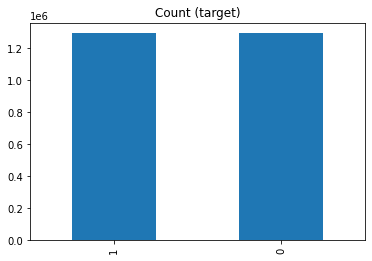

In [18]:
count_class_0, count_class_1 = train_set[label_column].value_counts()
print(count_class_0, count_class_1)
# Divide by class
df_class_0 = train_set[train_set[label_column] == 1]
df_class_1 = train_set[train_set[label_column] == 0]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.groupby(label_column).size())

df_test_under[label_column].value_counts().plot(kind='bar', title='Count (target)');

In [19]:
from sklearn import tree
clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(
    df_test_under[feature_columns], 
    df_test_under[label_column]
)

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

predicted_labels = clf3.predict(test_set[feature_columns])
true_labels = test_set[label_column].tolist()

print(f1_score(true_labels, predicted_labels))

print(le_ut.transform(unique_labels))
print(unique_labels)

# true_labels = le_ut.inverse_transform(true_labels)
# predicted_labels = le_ut.inverse_transform(predicted_labels)

print(classification_report(true_labels, predicted_labels))

0.8887296663399249
[1 0]
['Subscriber' 'Customer']
              precision    recall  f1-score   support

           0       0.36      0.83      0.50    637643
           1       0.97      0.82      0.89   5152363

    accuracy                           0.82   5790006
   macro avg       0.67      0.82      0.69   5790006
weighted avg       0.91      0.82      0.85   5790006



In [21]:
clf3.feature_importances_

array([0.18972562, 0.07573113, 0.06989771, 0.07228421, 0.07006665,
       0.07796495, 0.03271747, 0.41161226])